## SWE 546 Assignment 1

Eylül Akar | 2015719003

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



    Your Name : Eylül Akar

In [8]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452.0,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383.0,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326.0,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324.0,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195.0,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474.0,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887.0,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789.0,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561.0,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157.0,NaN


In [9]:
BaseYear = 1966
degree = 4

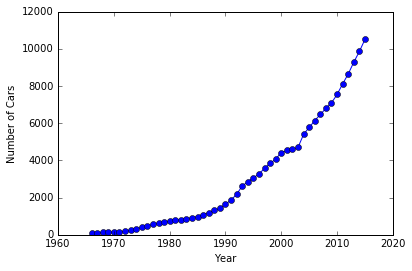

In [10]:
### Number of "Cars"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Cars")
plt.show()

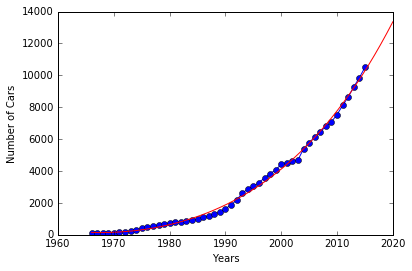

In [11]:
### Vandermonde Matrix for Cars
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Cars')

plt.show()

In [14]:
print("Cars in 2016:")
print(f[45])
print("Cars in 2017:")
print(f[46])
print("Cars in 2018:")
print(f[47])
print("Cars in 2019:")
print(f[48])
print("Cars in 2020:")
print(f[49])

Cars in 2016:
[[ 10620.67203221]]
Cars in 2017:
[[ 11262.40740415]]
Cars in 2018:
[[ 11932.90211242]]
Cars in 2019:
[[ 12633.11030307]]
Cars in 2020:
[[ 13364.00725276]]


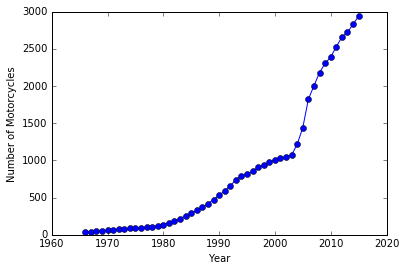

In [13]:
### Number of "Motorcycles"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Motorcycle[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Motorcycles")
plt.show()

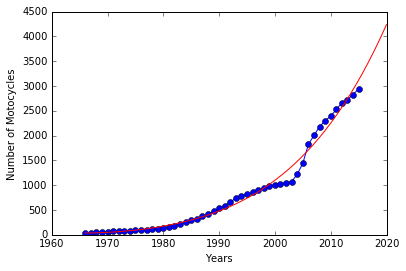

In [7]:
### Vandermonde Matrix for Motocycles

N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Motocycles')

plt.show()

In [15]:
print("Motocycles in 2016:")
print(f[45])
print("Motocycles in 2017:")
print(f[46])
print("Motocycles in 2018:")
print(f[47])
print("Motocycles in 2019:")
print(f[48])
print("Motocycles in 2020:")
print(f[49])

Motocycles in 2016:
[[ 10620.67203221]]
Motocycles in 2017:
[[ 11262.40740415]]
Motocycles in 2018:
[[ 11932.90211242]]
Motocycles in 2019:
[[ 12633.11030307]]
Motocycles in 2020:
[[ 13364.00725276]]


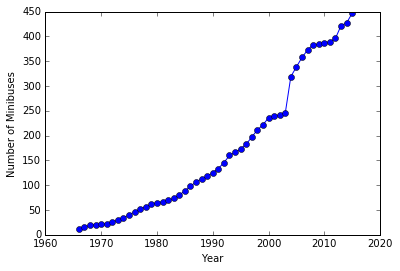

In [9]:
### Number of "Minibuses"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Minibus[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Minibuses")
plt.show()

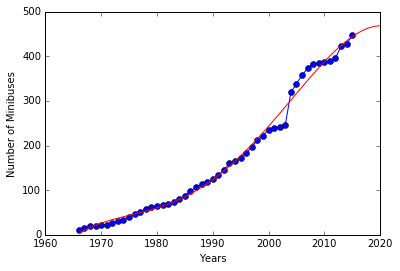

In [10]:
### Vandermonde Matrix for Minibuses
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Minibuses')

plt.show()

In [16]:
print("Minibuses in 2016:")
print(f[45])
print("Minibuses in 2017:")
print(f[46])
print("Minibuses in 2018:")
print(f[47])
print("Minibuses in 2019:")
print(f[48])
print("Minibuses in 2020:")
print(f[49])

Minibuses in 2016:
[[ 10620.67203221]]
Minibuses in 2017:
[[ 11262.40740415]]
Minibuses in 2018:
[[ 11932.90211242]]
Minibuses in 2019:
[[ 12633.11030307]]
Minibuses in 2020:
[[ 13364.00725276]]


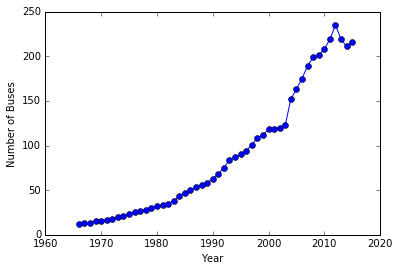

In [17]:
### Number of "Buses"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Bus[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Busses")
plt.show()

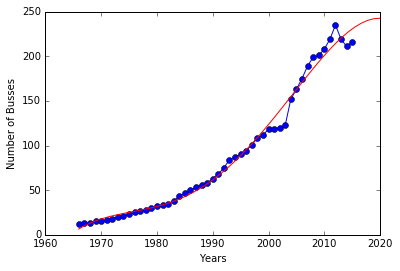

In [18]:
### Vandermonde Matrix for Buses
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Busses')

plt.show()

In [19]:
print("Busses in 2016:")
print(f[45])
print("Busses in 2017:")
print(f[46])
print("Busses in 2018:")
print(f[47])
print("Busses in 2019:")
print(f[48])
print("Busses in 2020:")
print(f[49])

Busses in 2016:
[[ 233.21291617]]
Busses in 2017:
[[ 237.23777892]]
Busses in 2018:
[[ 240.22296004]]
Busses in 2019:
[[ 242.04535914]]
Busses in 2020:
[[ 242.57691345]]


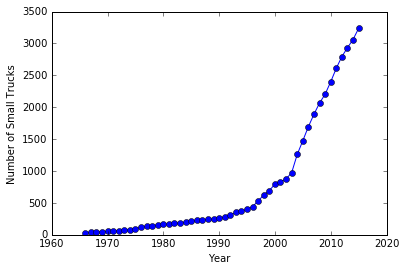

In [15]:
### Number of "Small Trucks"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SmallTruck[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Small Trucks")
plt.show()

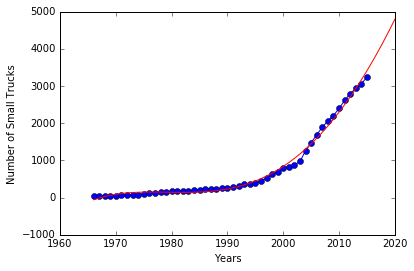

In [16]:
### Vandermonde Matrix for Small Trucks
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Small Trucks')

plt.show()

In [20]:
print("Small Trucks in 2016:")
print(f[45])
print("Small Trucks in 2017:")
print(f[46])
print("Small Trucks in 2018:")
print(f[47])
print("Small Trucks in 2019:")
print(f[48])
print("Small Trucks in 2020:")
print(f[49])

Small Trucks in 2016:
[[ 233.21291617]]
Small Trucks in 2017:
[[ 237.23777892]]
Small Trucks in 2018:
[[ 240.22296004]]
Small Trucks in 2019:
[[ 242.04535914]]
Small Trucks in 2020:
[[ 242.57691345]]


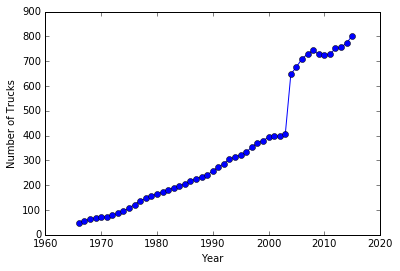

In [18]:
### Number of "Trucks"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Truck[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Trucks")
plt.show()

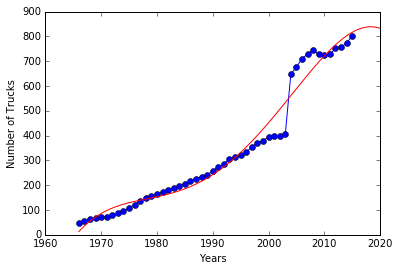

In [19]:
### Vandermonde Matrix for Trucks
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Trucks')

plt.show()

In [20]:
print("Trucks in 2016:")
print(f[45])
print()
print("Trucks in 2017:")
print(f[46])
print()
print("Trucks in 2018:")
print(f[47])
print()
print("Trucks in 2019:")
print(f[48])
print()
print("Trucks in 2020:")
print(f[49])

Trucks in 2016:
[[ 823.76275181]]

Trucks in 2017:
[[ 833.5262518]]

Trucks in 2018:
[[ 838.67268132]]

Trucks in 2019:
[[ 838.64945456]]

Trucks in 2020:
[[ 832.88058656]]


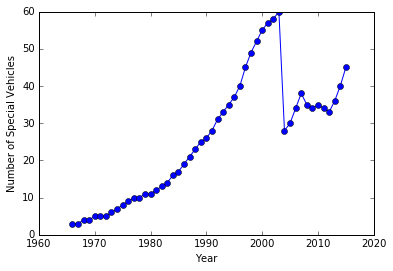

In [21]:
### Number of "Special Vehicles"
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SpecialVehicles[0:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Special Vehicles")
plt.show()

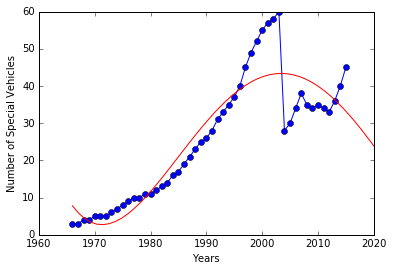

In [22]:
### Vandermonde Matrix for Special Vehicles
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Special Vehicles')

plt.show()

In [24]:
print("Special Vehicles in 2016:")
print(f[45])
print("Special Vehicles in 2017:")
print(f[46])
print("Special Vehicles in 2018:")
print(f[47])
print("Special Vehicles in 2019:")
print(f[48])
print("Special Vehicles in 2020:")
print(f[49])

Special Vehicles in 2016:
[[ 32.2429765]]
Special Vehicles in 2017:
[[ 30.30266882]]
Special Vehicles in 2018:
[[ 28.25650019]]
Special Vehicles in 2019:
[[ 26.12030592]]
Special Vehicles in 2020:
[[ 23.9112297]]


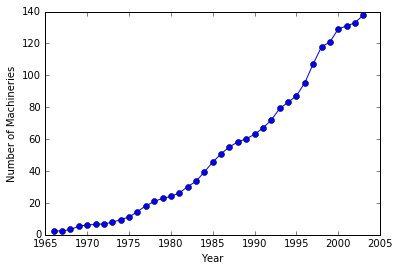

In [41]:
### Number of "Machineries"
x = np.matrix(df_arac.Year[0:38]).T-BaseYear
y = np.matrix(df_arac.Machinery[0:38]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Machineries")
plt.show()

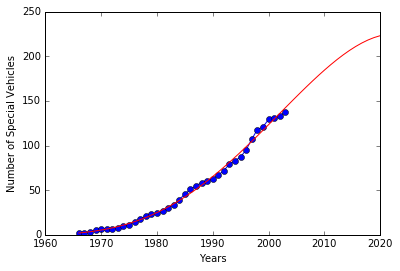

In [42]:
### Vandermonde Matrix for Machineries
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Special Vehicles')

plt.show()

In [25]:
print("Machineries in 2016:")
print(f[45])
print("Machineries in 2017:")
print(f[46])
print("Machineries in 2018:")
print(f[47])
print("Machineries in 2019:")
print(f[48])
print("Machineries in 2020:")
print(f[49])

Machineries in 2016:
[[ 32.2429765]]
Machineries in 2017:
[[ 30.30266882]]
Machineries in 2018:
[[ 28.25650019]]
Machineries in 2019:
[[ 26.12030592]]
Machineries in 2020:
[[ 23.9112297]]


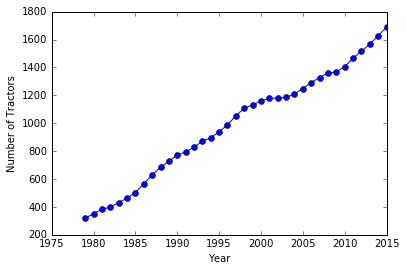

In [39]:
### Number of "Tractors"
x = np.matrix(df_arac.Year[13:]).T-BaseYear
y = np.matrix(df_arac.Tractor[13:]).T/1000
plt.plot(x+BaseYear, y, "o-")
plt.xlabel("Year")
plt.ylabel("Number of Tractors")
plt.show()

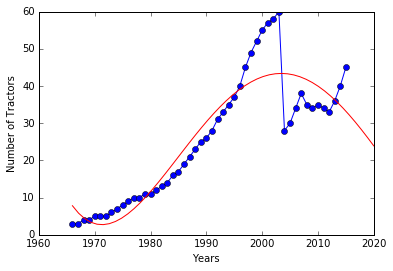

In [27]:
### Vandermonde Matrix for Tractors
N = len(x)
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')

plt.xlabel('Years')
plt.ylabel('Number of Tractors')

plt.show()

In [28]:
print("Tractors in 2016:")
print(f[45])
print("Tractors in 2017:")
print(f[46])
print("Tractors in 2018:")
print(f[47])
print("Tractors in 2019:")
print(f[48])
print("Tractors in 2020:")
print(f[49])

Tractors in 2016:
[[ 32.2429765]]
Tractors in 2017:
[[ 30.30266882]]
Tractors in 2018:
[[ 28.25650019]]
Tractors in 2019:
[[ 26.12030592]]
Tractors in 2020:
[[ 23.9112297]]
